## Convolutional Neural Networks   
When classifying images with (simple) feed forward neural networks we noticed that, due to the __linearizing__, we ignore typical image features like shapes or edges. To cope with this more advanced neural networks are often used in computer vision applications. In this section we discuss convolutional neural networks, also called convnets or CNNs. They’re also used in non-vision applications, such as NLP, recommender systems and much more. 
  
The concept of convolution is based on the observation that images are rather stationary, which means they have a lot of repeating patches.  
![](images/cnnbird.png)
So instead of focusing on the entire image, which would be very compute intensive, we can better focus on patch levels. This is accomplished by convolving (Nederlands = rollen) a patch over the image resulting in a filtered image with a reduced dimension. That patch (or kernel) is a small area (typical a 3 x 3 square) that shifts over the original image from left to right and from top to bottom and that performs a simple arithmetic operation with the corresponding square in the image.  
  
Let’s examine convolution on a 6x6 image (Deitel & Deitel, 2019). Consider the following diagram in which the 3x3 shaded square represents the kernel – the numbers are simply position numbers showing the order in which the kernels are visited and processed. 
![](images/cnnlayer.png) 
You can think of the kernel as a __sliding window__ that the convolution layer moves one pixel at a time left-to-right across the image. When the kernel reaches the right edge, the convolution layer moves the kernel one pixel down and repeats the left-to-right process.  
  
The convolution layer performs mathematical calculations using those nine features to “learn” about them, then outputs __one new feature__ to position 1 in the layer’s output. An example of such a kernel and the calculations is shown below. 
![](images/cnnkernel.png)
In the above example the value in the upper left corner of the output feature map is calculated as:  
\begin{equation}  
(0 * 0) + (0 * 0) + (1 * 1) + (0 *1) + (1 * 0) + (0 * 1) + (1 * 1) + (0 * 1) + (1 * 1) = 3
\end{equation}
  
The kernel values are chosen by Keras based on best-practices.  
  
By looking at features near one another, the network begins to recognize features like edges, straight lines and curves. This might look like magic but it turns out that applying several convolutional layers results in learning essential features of the original image like in the examples below. 
![](images/cnnresults.png)   
  
Next, the convolution layer moves the kernel one pixel to the right (known as the stride) to position 2 in the output layer. This new position overlaps with two of the three columns in the previous position, so that the convolution layer can learn from all the features that touch one another. The layer learns from the nine features in the kernel in position 2 and outputs one new feature in position 2 of the output, as in:
![](images/cnnlayer2.png)   
The complete pass of the image left-to-right and top-to-bottom is called a __filter__. For a 3x3 kernel, the filter dimensions (4x4 in our sample above), will be two less than the input dimensions (6x6). In the case of the MNIST digits for each 28x28 MNIST image, the filter will be 26x26.  
  
The number of filters in the convolutional layer is commonly 32 or 64 when processing small images like those in MNIST, and each filter produces different results, since each kernel has 0’s and 1’s in different positions. The number of filters depends on the image dimensions – higher-resolution images have more features, so they require more filters. The set of filters produced by a convolution layer is called a __feature map__.  
  
Subsequent convolution layers combine features from previous feature maps to recognize larger features and so on. If we were doing facial recognition, early layers might recognize lines, edges, and curves, and subsequent layers might begin combining those into larger features like eyes, eyebrows, noses, ears and mouths. Once a network learns a feature because of convolution, it can recognize that feature anywhere in the image. This is one of the reasons that convnets are used for object recognition in images.  
    
We will now apply these concepts to the MNIST dataset we have used before. 

* **60,000** labeled digit image samples for **training**, **10,000** for testing
* **28-by-28 pixel images** (**784 features**), represented as **NumPy arrays**
* **Grayscale pixel intensity** (shade) values **0-255** 
* **Convnet** will perform [**probabilistic classification**](https://en.wikipedia.org/wiki/Probabilistic_classification)
	* Model will output **10 probabilities** indicating likelihood a digit is **0-9**
	* **Highest probability** is the **predicted value**

### Loading and exploring the MNIST Dataset

In [1]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

C:\Users\jcor864\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jcor864\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jcor864\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jcor864\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Data Preparation
* MNIST dataset **requires some preparation** for use in a Keras convnet

#### Reshaping the Image Data 
* **Keras convnets** require **NumPy array inputs** 
* Each **sample** must have the **shape**
> (**width**, **height**, **channels**)
* Each pixel has **one channel** (grayscale shade 0-255), so sample shapes will be 
> **`(28, 28, 1)`**
* As the **neural network learns** from the images, it **creates many more channels**
    * These channels will **represent more complex features**, like **edges**, **curves** and **lines**
    * Enable network to **recognize digits** based on these features and how they’re **combined**  
  
* NumPy array method `reshape` receives a tuple representing the new shape

In [2]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

X_train.shape

(60000, 28, 28, 1)

In [3]:
X_test = X_test.reshape((10000, 28, 28, 1))

X_test.shape

(10000, 28, 28, 1)

### Normalizing the Image Data 
* **Numeric feature values** may vary widely
* Deep learning networks **perform better** on data that's **normalized** into
    * the range **0.0-1.0**, or 
    * a range for which the data’s **mean is 0.0** and its **standard deviation is 1.0**
        * S. Ioffe and Szegedy, C., “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift.” https://arxiv.org/abs/1502.03167
* Divide **each pixel** value by **255** to normalize into the range **0.0-1.0**:

In [4]:
X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

### One-Hot Encoding: Convert Labels to Categorical Data 
* **Predictions** for each digit will be an **array of 10 probabilities** 
* To **evaluate model accuracy**, Keras **compares predictions to dataset's labels**
    * Both must have the **same shape**
    * MNIST labels are **individual integers 0-9**
* Must **transform labels** into **categorical data arrays** matching the **prediction format**
* Use [**one-hot encoding**](https://en.wikipedia.org/wiki/One-hot) to convert labels from integers into 10-element **arrays of 1.0s and 0.0s** 
    * **only one element is 1.0** and the **rest are 0.0s**
* Categorical representation of a **7**
> <pre>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, <strong>1.0</strong>, 0.0, 0.0]</pre>
* **`tensorflow.keras.utils`** function **`to_categorical`** performs **one-hot encoding**
* Transform **`y_train`** and **`y_test`** into **two-dimensional arrays of categorical data**

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

print(y_train.shape)

print(y_train[0])  # one sample’s categorical data

y_test = to_categorical(y_test)

print(y_test.shape)

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)


## Creating the Neural Network
* Configure a **convolutional neural network**
* **`Sequential` model** stacks layers to **execute sequentially**
    * **output** of one layer becomes **input** to the next
    * **Feed-forward network**
    * Later, you’ll see that not all layers feed output to the next layer

In [6]:
from tensorflow.keras.models import Sequential 

cnn = Sequential() 

### Adding Layers to the Network
* A typical **convnet** consists of 
	* **input layer** that receives **training samples**
	* **hidden layers** that **learn** from training samples
	* **output layer** that **produces predictions**
* Import layer classes for a basic **convnet**

In [7]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

### Convolution
* We'll start with a **convolution layer**
* Uses the **relationships between pixels in close proximity** to learn useful **features** (or patterns) in small areas of each sample
* These **features** become **inputs** to **subsequent layers**   
  
* [**Kernels typically are 3-by-3**](https://www.quora.com/How-can-I-decide-the-kernel-size-output-maps-and-layers-of-CNN)
    * We found convnets that used **5-by-5** and **7-by-7** 
    * Kernel-size is a **hyperparameter**
* By looking at **features near one another**, the network begins to **recognize features** 
    * Like **edges**, **straight lines** and **curves**  
    
* Next, **convolution layer** moves **kernel one pixel to the right** (the **stride**) 
* **Overlaps** with previous kernel, so **convolution layer can learn** from all **features that touch one another**
* **Complete pass** left-to-right and top-to-bottom is called a **filter**
* For a **3-by-3 kernel**, the filter dimensions will be **two less than the input dimensions**
    * For each 28-by-28 MNIST image, the filter will be 26-by-26 
* **Number of filters** in the **convolutional layer** is commonly **32** or **64** for small images
* Each filter produces different results
* **Higher-resolution images** have **more features**, so they **require more filters**   
* **Set of filters** produced by a **convolution layer** is called a **feature map**

### Adding a Convolution Layer
* **`Conv2D`** implements the convolution layer

In [8]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

Instructions for updating:
Colocations handled automatically by placer.


* **`filters=64`**—The number of **filters** in the resulting **feature map**.
* **`kernel_size=(3, 3)`**—The **size of the kernel** used in each **filter**
* **`activation='relu'`**—**Rectified Linear Unit activation function** is used to produce this layer’s output
    * **Most widely used activation function** (Chollet, François. _Deep Learning with Python_. p. 72. Shelter Island, NY: Manning Publications, 2018)
    * [**Good for performance** because it’s **easy to calculate**](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02) 
    * [Commonly recommended for **convolutional layers**](https://www.quora.com/How-should-I-choose-a-proper-activation-function-for-the-neural-network)   
  
* **First layer** in the model, so we specify the shape of each sample with `input_shape=(28, 28,1)` 
	* Creates an **input layer** to **load the samples** and pass them into the **`Conv2D` layer**, which is actually the **first hidden layer**
* Each subsequent layer **infers `input_shape`** from previous layer’s **output shape**
    * Makes it easy to **stack** layers

### Dimensionality of the First Convolution Layer’s Output
* Input samples are 28-by-28-by-1—that is, **784 features each**
* Specified **64 filters** and a **3-by-3 kernel** for the layer, so the **feature map size is 26-by-26-by-64** for a total of **43,264 features** 
	* **Significant increase in dimensionality** 
    * **Enormous** compared to numbers of features processed in our Machine Learning examples
* As each layer adds features, feature map **dimensionality** grows significantly
    * This is one of reasons **deep learning** often requires **tremendous processing power**

### Overfitting 
* Can occur when a **model is too complex** compared to what it is modeling
* **Most extreme case**: Model **memorizes** its training data's features
* **Overfitting** tends to occur in **deep learning** as the **dimensionality** becomes **too large** [\[1\]](https://cs231n.github.io/convolutional-networks/),[\[2\]](https://medium.com/@cxu24/why-dimensionality-reduction-is-important-dd60b5611543),[\[3\]](https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a)
* **Higher dimensionality** also increases (and sometimes explodes) **computation time**
* For deep learning on **CPUs**, training could become **intolerably slow**
* There are various techniques to **prevent overfitting** [\[1\]](https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d), [\[2\]](https://www.kdnuggets.com/2015/04/preventing-overfitting-neural-networks.html) &mdash; we'll use **pooling**

### Adding a Pooling Layer 
* To **reduce overfitting** and **computation time**, a **convolution layer** is often followed by one or more layers that **reduce dimensionality** of **convolution layer’s output**
* **Pooling compresses** (or **down-samples**) the results by **discarding features**
    * Helps make the model **more general**
* **Most common pooling technique** is called **max pooling**
	* Examines a 2-by-2 square of features and keeps only the maximum feature.

### Adding a Pooling Layer (cont.)
* 2-by-2 blue square in position 1 represents the initial pool of features to examine:

![Max pooling diagram showing the 6-by-6 set of numeric values we wish to compress with the 2-by-2 blue square in position 1 representing the initial pool of features to examine, and the 3-by-3 square representing the results of max pooling](images/pooling.png "Max pooling diagram showing the 6-by-6 set of numeric values we wish to compress with the 2-by-2 blue square in position 1 representing the initial pool of features to examine, and the 3-by-3 square representing the results of max pooling")

* Outputs **maximum feature** from each pool
* Unlike convolution **pools do not overlap** 
* **Stride** for a 2-by-2 pool is **2**
* Every group of four features is reduced to one, so 2-by-2 pooling **compresses** number of features by **75%**
* Reduces previous layer’s output from **26-by-26-by-64** to **13-by-13-by-64**

In [9]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

### Adding Another Convolutional Layer and Pooling Layer
* **Convnets** often have **many convolution and pooling layers**. 
* [Keras team’s convnets](https://github.com/keras-team/keras-applications/tree/master/keras_applications) tend to **double** the number of **filters** in subsequent **convolutional layers** to enable the models to learn more relationships between the features

In [10]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

* **Input** to the **second convolution layer** is the 13-by-13-by-64 **output of the first pooling layer**
* **Output** of this **Conv2D layer** will be **11-by-11-by-128**
* For **odd dimensions** like 11-by-11, **Keras pooling layers round down** by default (in this case to 10-by-10), so this pooling layer’s **output** will be **5-by-5-by-128**

### Flattening the Results
* Model's **final output** will be a **one-dimensional** array of 10 probabilities that classify the digits
* To prepare for **one-dimensional final predictions**, need to **flatten** the previous layer’s output to **one dimension**
* **`Flatten`** layer's output will be **1-by-3200** (5 &#215; 5 &#215; 128)

In [11]:
cnn.add(Flatten())

### Adding a Dense Layer to Reduce the Number of Features
* Layers before the **`Flatten`** layer **learned digit features**
* Now must **learn the relationships among those features** to **classify** which digit each image represents
* Accomplished with **fully connected `Dense` layers**
* The following **`Dense` layer** creates **128 neurons (`units`)** that **learn** from the 3200 outputs of the previous layer

In [12]:
cnn.add(Dense(units=128, activation='relu'))

* Many **convnets** contain **at least one `Dense` layer** 
* **Convnets** geared to more complex image datasets with higher-resolution images like [**ImageNet**](http://www.image-net.org)—a dataset of over 14 million images—often have **several `Dense` layers**, commonly with **4096 neurons**
* See the [Keras pretrained ImageNet convnets' code](https://github.com/keras-team/keras-applications/tree/master/keras_applications)

### Adding Another Dense Layer to Produce the Final Output
* Final **`Dense`** layer **classifies** inputs into **neurons** representing the classes **0-9**
* The **`softmax` activation function** converts values of these 10 neurons into **classification probabilities**
* **Neuron** with **highest probability** represents the **prediction** for a given digit image

In [13]:
cnn.add(Dense(units=10, activation='softmax'))

### Printing the Model’s Summary 
* Use model’s **`summary`** method
* Note layers' **output shapes** and **numbers of parameters**
* **Parameters** are the **weights** that the network **learns** during training [\[1\]](https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491),[\[2\]](https://www.kdnuggets.com/2018/06/deep-learning-best-practices-weight-initialization.html) 
* **Relatively small network**, but needs to **learn nearly 500,000 parameters**! 
	* This is for **tiny images** that are less than 1/4 the size of icons on smartphone home screens
	* Imagine how many features a network would have to learn to process high-resolution 4K video frames or the super-high-resolution images produced by today’s digital cameras 
* In the **`Output Shape`** column, **`None`** means the model does not know in advance how many training samples you’re going to provide

In [14]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

### Compiling the Model 
* Complete the model by calling its **`compile` method**

In [15]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

* **`optimizer='adam'`**—The **optimizer** this model uses to **adjust the weights** throughout the neural network **as it learns**
	* [**Keras optimizers**](https://keras.io/optimizers/)
	* `'adam'` performs well across a wide variety of models [\[1\]](https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2),[\[2\]](https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f)   
   
* **`loss='categorical_crossentropy'`**—The **loss function** used by the optimizer in **multi-classification networks** (ours predicts 10 classes)
	* **Optimizer** attempts to **minimize the values returned by the loss function** 
	* For **binary classification**, Keras provides **`'binary_crossentropy'`**, and for **regression**, **`'mean_squared_error'`**
	* [Other loss functions](https://keras.io/losses/)

* **`metrics=['accuracy']`**—List of **metrics** the network will produce to help you **evaluate the model**
	* **Accuracy** commonly used in **classification models**
	* We’ll use it to check **percentage of correct predictions**
	* [Other metrics](https://keras.io/metrics/)

## Training and Evaluating the Model 
* **Train a Keras model** by calling its **`fit` method**
```python
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
```
* **`epochs=5`**&mdash;train neural networks iteratively over time
    * Each **`epoch`** processes **every training dataset sample** once
    * **Hyperparameter** that may need tuning
* **`batch_size=64`**&mdash;**number of samples to process at a time**
    * Most models specify a **power of 2 from 32 to 512**
* [**`validation_split=0.1`**&mdash;model should reserve the **last** 10% of the training samples for validation](https://keras.io/getting-started/faq/#how-is-the-validation-split-computed) 
	* After each **epoch**, model uses validation samples to **make predictions** and display the **validation loss and accuracy** 
    * Use **tune your layers** and the **`fit` method’s hyperparameters**, or possibly change the **layer composition** of your model
    * Can specify **separate validation data** with **`validation_data` argument** 

In [16]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
54000/54000 [==============================] - 95s 2ms/sample - loss: 0.1489 - acc: 0.9536 - val_loss: 0.0454 - val_acc: 0.9858
Epoch 2/5
54000/54000 [==============================] - 92s 2ms/sample - loss: 0.0431 - acc: 0.9868 - val_loss: 0.0375 - val_acc: 0.9882
Epoch 3/5
54000/54000 [==============================] - 90s 2ms/sample - loss: 0.0304 - acc: 0.9907 - val_loss: 0.0326 - val_acc: 0.9902
Epoch 4/5
54000/54000 [==============================] - 97s 2ms/sample - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0310 - val_acc: 0.9908
Epoch 5/5
54000/54000 [==============================] - 95s 2ms/sample - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0351 - val_acc: 0.9915


* As training proceeds, **`fit`** shows the **progress** of each **epoch**, **how long** the epoch took to execute, and the **evaluation metrics** for that epoch
* Impressive **training accuracy (`acc`**) and **validation accurracy (`acc`)**, given that **we have not yet tried to tune the hyperparameters** or **tweak the number and types of the layers**

### Evaluating the Model on Unseen Data with Model’s **`evaluate` Method**

In [17]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print(loss)
print(accuracy)

10000/10000 [==============================] - 6s 560us/sample - loss: 0.0349 - acc: 0.9896s - lo
0.034876395662462166
0.9896


* Without tuning, our **convnet model** is **+/-99% accurate** for **unseen data samples**
    * Can find models online that predict MNIST with even **higher accuracy**
    * **Experiment** with different numbers of layers, types of layers and layer parameters and observe how those changes affect your results

### Making Predictions with the Model’s **`predict` Method** 

In [18]:
predictions = cnn.predict(X_test)

* The first digit should be a 7 (shown as `1.` at index 7)

In [19]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

* Check the **probabilities** returned by **`predict`** for **first test sample**

In [20]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000057%
1: 0.0000000018%
2: 0.0000003320%
3: 0.0000000329%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000001%
9: 0.0000000658%


* Our model believes this digit is a 7 with **nearly** 100% certainty
* Not all predictions have this level of certainty

### Locating the Incorrect Predictions 
* View some **incorrectly predicted images** to get a sense of digits **our model has trouble with**
	* If the model always mispredicts 8s, perhaps we need more 8s in our training data
* To determine whether a prediction was correct, compare the index of the largest probability in `predictions[0]` to the index of the element containing **`1.0` in `y_test[0]`**
	* If **indices** are the same, **prediction was correct**
* **Reshape the samples** from the shape `(28, 28, 1)` that Keras required for learning back to `(28, 28)`, which **Matplotlib requires to display the images**

In [21]:
import numpy as np

# Locating the Incorrect Predictions
images = X_test.reshape((10000, 28, 28))

incorrect_predicted_images = []
predicted_digits = []
expected_digits = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_digits.append(predicted)
        expected_digits.append(expected)

In [22]:
len(incorrect_predicted_images)  # number of incorrect predictions

104

### Visualizing Incorrect Predictions
* **Display 24 of the incorrect images** labeled with each image’s index, predicted value (`p`) and expected value (`e`)
* Before reading the **expected values**, look at each digit and write down what digit you think it is
* This is an important part of **getting to know your data**
<!--![24 incorrectly predicted digit images](./ch15images/incorrect24.png "24 incorrectly predicted digit images")-->

 

<Figure size 432x288 with 0 Axes>

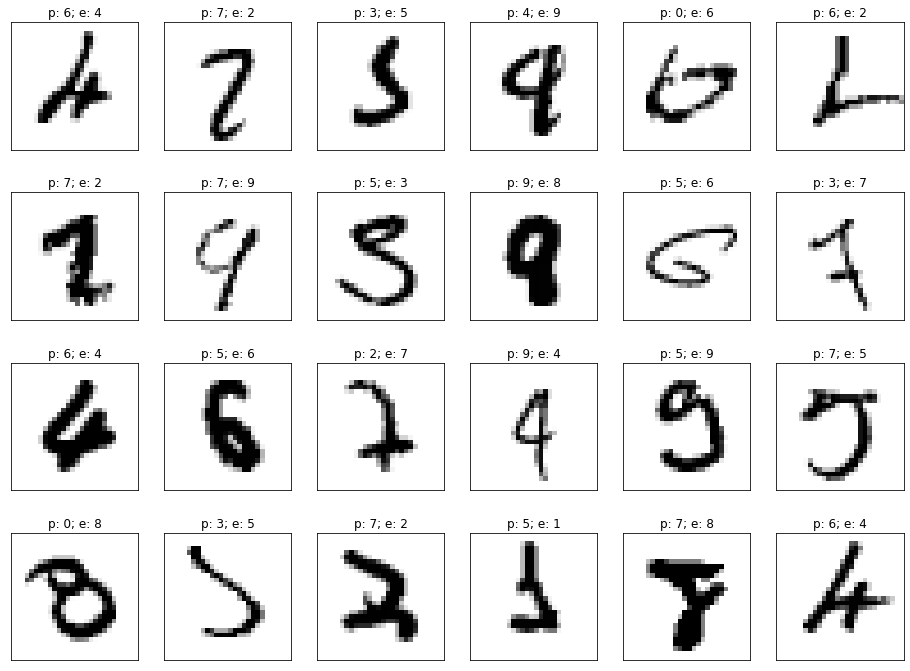

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(16, 12))

for i in range(nrows*ncols):  # show first nrowsxncols digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(f'p: {predicted_digits[i]}; e: {expected_digits[i]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis